# POC for Genetic Algorithm WOLT

### Imports

In [1]:
import pygad
import numpy as np
import pandas as pd
from IPython.display import Image, display

### helper functions:

In [2]:
NO_IMAGE_URL = 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/No_image_available.svg/1024px-No_image_available.svg.png'

In [3]:
def print_dish(dish):
    print('-' * 50)
    print(f'{dish["name"]} - {dish["price"]} ₪')
    
    if type(dish["image"]) == str:
        display(Image(url=dish["image"], width=400, height=400))
    else:
        display(Image(url=NO_IMAGE_URL, width=200, height=200))

    print(f'vegetarian: {"✅" if dish["vegetarian"] else "❌"}', end=' ')
    print(f'GF: {"✅" if dish["GF"] else "❌"}', end=' ')
    print(f'spicy: {"✅" if dish["spicy"] else "❌"}', end=' ')
    print(f'alcohol_percentage: {"✅" if dish["alcohol_percentage"] else "❌"}')
    print('-' * 50)


In [4]:
def get_user_input(people=4, price=200, vegetarian=None, GF=None, spicy=None, alcohol_percentage=None):
    return dict(people   = people,
                price    = 80 * people if not price else price,
                vegetarian    = np.zeros(people).astype(bool) if not vegetarian    else np.array(vegetarian   ).astype(bool),
                GF   = np.zeros(people).astype(bool) if not GF   else np.array(GF  ).astype(bool),
                spicy    = np.zeros(people).astype(bool) if not spicy    else np.array(spicy   ).astype(bool),
                alcohol_percentage = np.zeros(people).astype(bool) if not alcohol_percentage else np.array(alcohol_percentage).astype(bool))

### Loss (fitness) function:

In [5]:
def fitness_function(solution, solution_idx):
    solution = [database.iloc[i] for i in solution]

    total_price = sum([dish['price'] for dish in solution])
    price_const =  total_price < user_input['price']
    
    vegetarian_const = [dish['vegetarian'] == inp for (dish, inp) in zip(solution, user_input['vegetarian'])]    
    GF_const = [dish['GF'] == inp for (dish, inp) in zip(solution, user_input['GF'])]    
    spicy_const = [dish['spicy'] == inp for (dish, inp) in zip(solution, user_input['spicy'])]    
    alcohol_percentage_const = [(dish['alcohol_percentage'] > 0) == inp for (dish, inp) in zip(solution, user_input['alcohol_percentage'])]  
    
    hard_const = all([price_const,
                      all(vegetarian_const),
                      all(GF_const),
                      all(spicy_const),
                      all(alcohol_percentage_const)])
    
    soft_price = (user_input['price'] - total_price) / user_input['price']
    soft_const = np.mean([soft_price,
                          sum(vegetarian_const)    / user_input['people'], 
                          sum(GF_const)   / user_input['people'],
                          sum(spicy_const)    / user_input['people'],
                          sum(alcohol_percentage_const) / user_input['people'],
                         ])
    fitness = np.mean([int(hard_const), soft_const])
    res.append(fitness)

    return fitness

### Initialize

In [6]:
res = []

In [7]:
# load database for a restaurant:
total_df = pd.read_csv('./data/csv_wolt_menus_20-8-22.csv')
total_df

,rest_name,name,price,alcohol_percentage,vegetarian,GF,image,days,spicy
0,Doron's Jachnun | Tel Aviv,ג׳חנון תימני עצבני,25.0,0,False,False,https://wolt-menu-images-cdn.wolt.com/menu-ima...,"[1, 2, 3, 4, 5, 6, 7]",False
1,Taqueria,‫מרגריטה ליים קפואה,30.0,150,False,False,https://wolt-menu-images-cdn.wolt.com/menu-ima...,"[1, 2, 3, 4, 5, 6, 7]",False
2,Taqueria,נאצ׳וס להכנה בתנור,45.0,0,False,False,https://wolt-menu-images-cdn.wolt.com/menu-ima...,"[1, 2, 3, 4, 5, 6, 7]",False
3,Taqueria,🌶🌶 תירס הוואנה,21.0,0,False,False,https://wolt-menu-images-cdn.wolt.com/menu-ima...,"[1, 2, 3, 4, 5, 6, 7]",True
4,Taqueria,🌶🌶🌶 כנפיים חריפות,34.0,0,False,False,https://wolt-menu-images-cdn.wolt.com/menu-ima...,"[1, 2, 3, 4, 5, 6, 7]",True
...,...,...,...,...,...,...,...,...,...
125,JARS & BOWLS,אגוז ברזיל,28.0,0,False,False,https://wolt-menu-images-cdn.wolt.com/menu-ima...,"[1, 2, 3, 4, 5, 6, 7]",False
126,JARS & BOWLS,אוכמניות ללא סוכר,42.0,0,False,False,https://wolt-menu-images-cdn.wolt.com/menu-ima...,"[1, 2, 3, 4, 5, 6, 7]",False
127,JARS & BOWLS,אננס טבעי ללא סוכר,26.0,0,False,False,https://wolt-menu-images-cdn.wolt.com/menu-ima...,"[1, 2, 3, 4, 5, 6, 7]",False
128,JARS & BOWLS,גוג׳י ברי,22.0,0,False,False,https://wolt-menu-images-cdn.wolt.com/menu-ima...,"[1, 2, 3, 4, 5, 6, 7]",False


### User input:

In [8]:
user_input = get_user_input(people=4, price=150,
                            vegetarian         = [1, 0, 1, 1],
                            GF                 = [0, 0, 0, 0],
                            spicy              = [0, 1, 0, 0],
                            alcohol_percentage = [0, 0, 0, 0])
user_input

{'people': 4,
 'price': 150,
 'vegetarian': array([ True, False,  True,  True]),
 'GF': array([False, False, False, False]),
 'spicy': array([False,  True, False, False]),
 'alcohol_percentage': array([False, False, False, False])}

# Algorithm run:

------- Searching space of size 6660754 -------

 - Testing: Doron's Jachnun | Tel Aviv combinations 
	1 possible dishes

 - Testing: JARS & BOWLS combinations 
	40 possible dishes

 - Testing: Karnaf | Ibn Gvirol combinations 
	42 possible dishes

 - Testing: MeatBar Burger | Dizengoff Square combinations 
	16 possible dishes

 - Testing: Taqueria combinations 
	31 possible dishes


----------------- Best solution ------------------

Fitness:          0.9099999999999999
Hard constraints: 🏆
Total price:      135.0 ₪ (limit was 150 ₪)

--------------------------------------------------
🌱 סלט אקפולקו - 38.0 ₪


vegetarian: ✅ GF: ❌ spicy: ❌ alcohol_percentage: ❌
--------------------------------------------------
--------------------------------------------------
🌶 ‫תוספת קרניטס (125 מ"ל) - 21.0 ₪


vegetarian: ❌ GF: ❌ spicy: ✅ alcohol_percentage: ❌
--------------------------------------------------
--------------------------------------------------
🌱 סלט אקפולקו - 38.0 ₪


vegetarian: ✅ GF: ❌ spicy: ❌ alcohol_percentage: ❌
--------------------------------------------------
--------------------------------------------------
🌱 סלט אקפולקו - 38.0 ₪


vegetarian: ✅ GF: ❌ spicy: ❌ alcohol_percentage: ❌
--------------------------------------------------

Evolution Plot:


<AxesSubplot:>

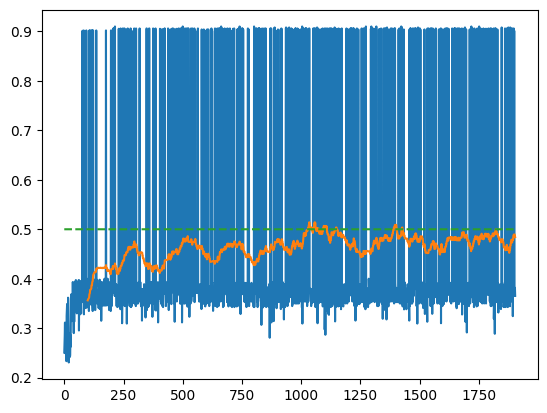

In [9]:
best_fitness = -np.inf
best_solution = np.nan
best_res = []
best_database = np.nan

combinations = 0
for _, df in total_df.groupby('rest_name'):
    combinations += (df.shape[0] ** user_input['people'])

print(f'------- Searching space of size {combinations} -------\n')

for restaurant, database in list(total_df.groupby('rest_name')):
    print(f' - Testing: {restaurant} combinations \n\t{database.shape[0]} possible dishes\n')
    database.reset_index(inplace=True, drop=True)
    res = []

    # choose run params:
    ga_instance = pygad.GA(num_generations         = 1000,
                           num_parents_mating      = 20,
                           sol_per_pop             = 30,
                           num_genes               = user_input['people'],

                           init_range_low          = 0,
                           init_range_high         = len(database),

                           random_mutation_min_val = 0,
                           random_mutation_max_val = len(database),

                           mutation_by_replacement = True,
                           mutation_num_genes      = 1,
                           mutation_probability    = 0.05,

                           gene_type               = int,
                           fitness_func            = fitness_function,
                          )

    # run:
    ga_instance.run()

    # print solution:
    solution, fitness, i = ga_instance.best_solution()
    
    if fitness > best_fitness:
        best_fitness = fitness
        best_res = res.copy()
        best_solution = solution
        best_database = database.copy()
    
best_solution = [best_database.iloc[i] for i in best_solution]

print(f'\n----------------- Best solution ------------------\n')
print(f'Fitness:          {best_fitness}')
print(f'Hard constraints: {"🏆" if best_fitness > 0.5 else "🛑"}')
print(f'Total price:      {sum([dish["price"] for dish in best_solution])} ₪ (limit was {user_input["price"]} ₪)')
print()
[print_dish(dish) for dish in best_solution]

print()
print('Evolution Plot:')
pd.Series(best_res).plot()
pd.Series(best_res).rolling(window=100).mean().plot()
pd.Series(np.ones(len(best_res)) * 0.5).plot(style='--')
